In [138]:
import numpy as np
import math
from datascience import *
# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [202]:
wages_actuary = Table.read_table('Data USA - Bar Chart of Wage Distribution for Actuaries-1.csv')\
    .drop([1,2,4,6]).relabeled("num_ppl","Number of actuaries in the US").relabeled("wage_bin_name","Wage bin")

wages_pop = Table.read_table('Data USA - Bar Chart of Wage Distribution for Actuaries-2.csv').drop([1,2,4,6])\
    .relabeled("wage_bin_name","Wage bin").relabeled("num_ppl","Number of actuaries in the Worldwide")
    
age = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').drop([1,2,4,7])\
    .relabeled("num_ppl","Number of people in workforce").relabeled("sex_name","Gender")
                                                                                                                                                                                                                                        
age_male = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').\
    take(range(0,56)).drop([1,2,4,7]).relabeled("num_ppl","Number of males in workforce")\
    .relabeled("sex_name","Gender")
                                                                                                                                                                                                                                                                                  
age_female = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').take(range(57,104)).drop([1,2,4,7])\
    .relabeled("num_ppl","Number of females in workforce").relabeled("sex_name","Gender")

major = Table.read_table('Data USA - Tree Map of Majors for Actuaries.csv').drop([1,2,4,5,6,8,9])\
    .relabeled("num_ppl","Number of people in workforce").relabeled("cip_name", "College Degree")
        
gender_with_degree = Table.read_table("Data USA - Bar Chart of Gender for Actuaries.csv")\
    .drop([2,4,6]).relabeled("cip_name", "College Degree")\
    .relabeled("num_ppl","Number of people in workforce").relabeled("sex_name","Gender")
                                                                                                                  
highest_paid = Table.read_table("Data USA - Bar Chart of Highest Paid for Actuaries.csv")\
    .drop([2,3,4,6,8]).relabeled(1,"Industry")\
    .relabeled("num_ppl","Number of people in workforce").relabeled("avg_wage","Average salary")
                                                                                                                                              
university = Table.read_table("Data USA - Tree Map of Universities for Actuaries.csv").drop([2,4])\
    .relabeled("grads_total","Total Graduates").relabeled("university_name", "University")\
    .relabeled("cip_name", "Degrees awards")  

wages_pop

year,Number of actuaries in the Worldwide,Wage bin
2014,19175353,< 10K
2014,21216573,$10-20K
2014,20932980,$20-30K
2014,18444902,$30-40K
2014,14459569,$40-50K
2014,11150671,$50-60K
2014,8509041,$60-70K
2014,6082701,$70-80K
2014,4560929,$80-90K
2014,3142806,$90-100K


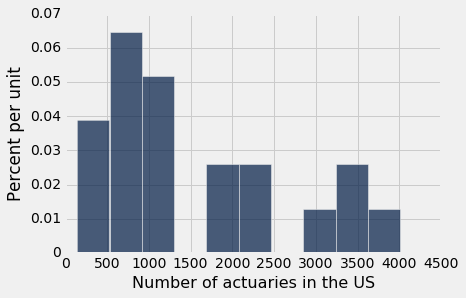

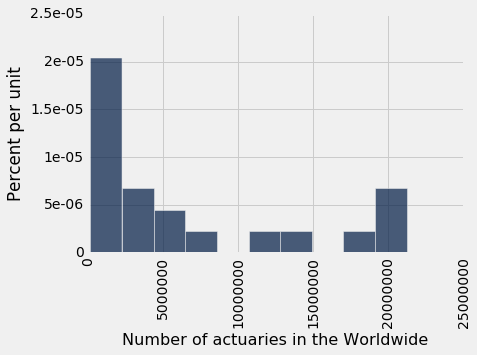

In [140]:
wages_actuary.hist(1)
wages_pop.hist(1)

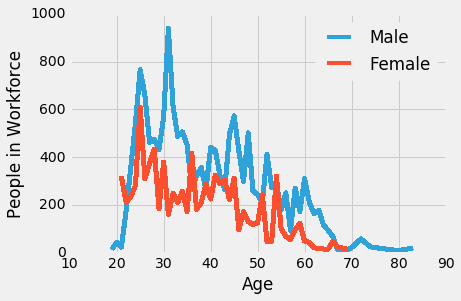

In [141]:
## The median age of Actuaries is 38.7, and Male employees are generally 0.622 years older
## than than their Female counterparts.
#gender.drop([1,2]).relabeled("People in workforce sum","Labors in the workforce")
# the histogram of the data
line, = plt.plot(age_male.column(2), age_male.column(3), '-', label='Male')
line.set_antialiased(False)
line, = plt.plot(age_female.column(2), age_female.column(3), '-', label='Female')
line.set_antialiased(False)
plt.xlabel('Age')
plt.ylabel('People in Workforce')
plt.legend(loc= 'upper right')

In [142]:
highest_paid.sort("Average salary",descending = True)

year,Industry,Number of people in workforce,Average salary
2014,"Management, scientific & technical consulting services",5266,151097
2014,"Securities, commodities, funds, trusts & other financial ...",732,144705
2014,Insurance carriers & related activities,22967,123618
2014,Nondepository credit & related activities,503,84288.7


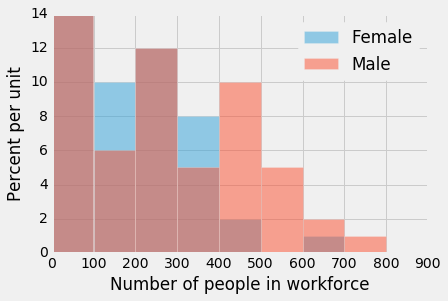

In [193]:
#Distribution of # of Female and Male in workforce
female = list(age_female.column(3))
male = list(age_male.column(3))
plt.hist(female, bins= np.arange(0,1000,100), alpha=0.5, label='Female')
plt.hist(male, bins= np.arange(0,1000,100), alpha=0.5, label='Male')
plt.legend(loc= 'upper right')
plt.xlabel('Number of people in workforce')
plt.ylabel('Percent per unit')
plt.show()



In [144]:
university.group(1,sum).drop([1,2]).sort(1,descending = True).relabeled("Total Graduates sum", "Graduates Total")

Degrees awards,Graduates Total
Business,780914
Social Sciences,199424
Computer and Information Sciences and Support Services,159143
Engineering,154963
Math & Statistics,36350


In [145]:
university.where("University", "University of California-Berkeley").sort(3,descending = True)

year,Degrees awards,University,Total Graduates
2014,Social Sciences,University of California-Berkeley,1878
2014,Engineering,University of California-Berkeley,1666
2014,Business,University of California-Berkeley,899
2014,Math & Statistics,University of California-Berkeley,509
2014,Computer and Information Sciences and Support Services,University of California-Berkeley,351


In [146]:
university.where("University", "Stanford University").sort(3,descending = True)

year,Degrees awards,University,Total Graduates
2014,Engineering,Stanford University,1205
2014,Business,Stanford University,490
2014,Computer and Information Sciences and Support Services,Stanford University,408
2014,Social Sciences,Stanford University,388
2014,Math & Statistics,Stanford University,210


In [147]:
def most_degreeaward(year):
    return university.where('year', 2014).sort('Total Graduates', descending=True)
most_degreeaward(2014)


year,Degrees awards,University,Total Graduates
2014,Business,University of Phoenix-Arizona,22396
2014,Business,Ashford University,7214
2014,Computer and Information Sciences and Support Services,University of Phoenix-Arizona,4973
2014,Business,DeVry University-Illinois,4473
2014,Business,University of Maryland-University College,4427
2014,Business,Webster University,4243
2014,Business,Florida International University,4218
2014,Business,American College of Financial Services,4146
2014,Business,Ivy Tech Community College,4079
2014,Business,New York University,3580


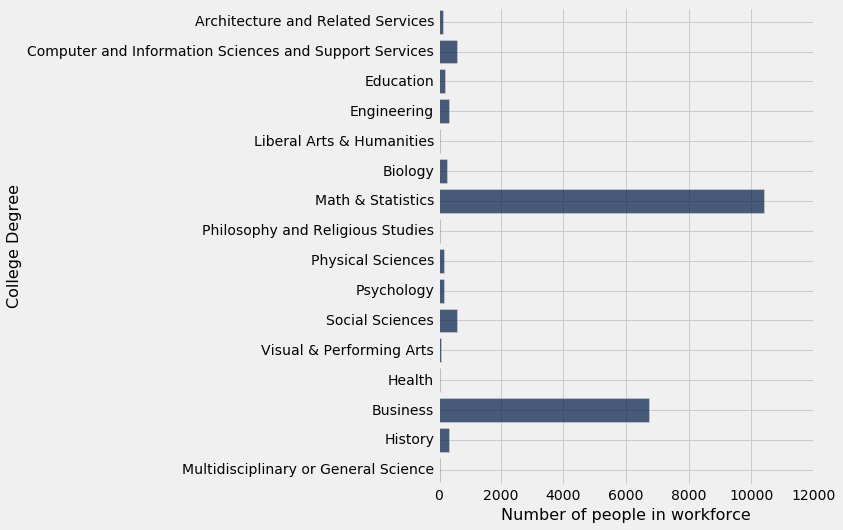

In [148]:
major.select([1,2]).barh('College Degree')

In [149]:
print('Number of individuals:', sum(gender_with_degree.column(3)))
print('Number of unique', gender_with_degree.group(1).column(0).item(0), 'values:', gender_with_degree.group(1,sum).column(3).item(0))
print('Number of unique', gender_with_degree.group(1).column(0).item(1), 'values:', gender_with_degree.group(1,sum).column(3).item(1))
print('Number of unique', gender_with_degree.group(1).column(0).item(2), 'values:', gender_with_degree.group(1,sum).column(3).item(2))
print('Number of unique', gender_with_degree.group(1).column(0).item(3), 'values:', gender_with_degree.group(1,sum).column(3).item(3))
print('Number of unique', gender_with_degree.group(1).column(0).item(4), 'values:', gender_with_degree.group(1,sum).column(3).item(4))

Number of individuals: 19515312
Number of unique Business values: 9997027
Number of unique Computer and Information Sciences and Support Services values: 1642351
Number of unique Engineering values: 3792716
Number of unique Math & Statistics values: 641072
Number of unique Social Sciences values: 3442146


In [150]:
genders_by_major = gender_with_degree.pivot("College Degree","Gender","Number of people in workforce",sum)
genders_by_major

Gender,Business,Computer and Information Sciences and Support Services,Engineering,Math & Statistics,Social Sciences
Female,4415928,408543,551436,248930,1514919
Male,5581099,1233808,3241280,392142,1927227


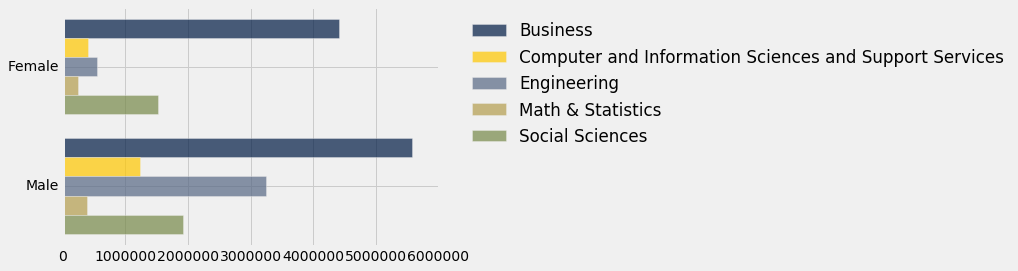

In [151]:
genders_by_major.barh(0)

In [152]:
diffs = gender_with_degree.select([1,2,3]).group('College Degree', np.diff).drop(1)\
    .relabeled("Number of people in workforce diff","Gender difference by college major")
diffs = Table().with_columns(["College degree",diffs.column(0),
                              "Gender difference by college major", np.concatenate(diffs.column(1))])
diffs

College degree,Gender difference by college major
Business,1165171
Computer and Information Sciences and Support Services,825265
Engineering,2689844
Math & Statistics,143212
Social Sciences,412308


In [153]:
def proportions(table, count_labels):
    for label in count_labels:
        column = table.column(label)
        table = table.with_column(label, column / sum(column))
        table.set_format(label, PercentFormatter(0))
    return table

proportions(genders_by_major, ["Business","Computer and Information Sciences and Support Services","Engineering",\
                               "Math & Statistics", "Social Sciences"])

Gender,Business,Computer and Information Sciences and Support Services,Engineering,Math & Statistics,Social Sciences
Female,44%,25%,15%,39%,44%
Male,56%,75%,85%,61%,56%


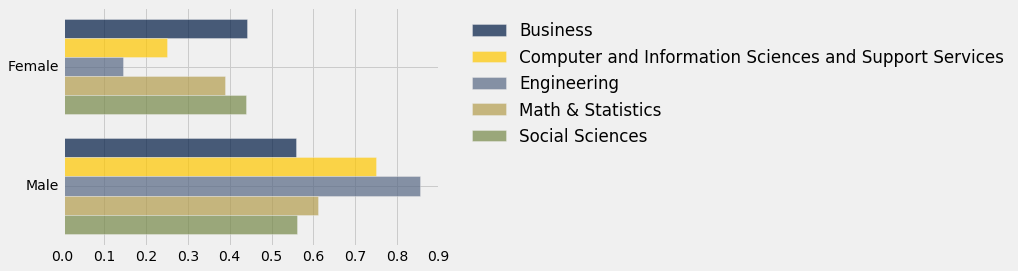

In [154]:
proportions(genders_by_major, ["Business","Computer and Information Sciences and Support Services","Engineering",\
                               "Math & Statistics", "Social Sciences"]).barh(0)

In [155]:
## Comparing distributions
## The tvd function (from the textbook) below computes the total variation distance between
## the distributions of two conditions.
def tvd(t, conditions, values):
    counts = t.pivot(conditions, values)
    categoryA = np.array(counts.labels).item(1)
    categoryB = np.array(counts.labels).item(2)
    props = proportions(counts, [categoryA, categoryB])
    a = props.column(1)
    b = props.column(2)
    return 0.5*sum(abs(a - b))
tvd(age, 'Gender', 'Number of people in workforce')


0.82142857142857062

In [156]:
##  max_deviation function, which takes the same inputs as tvd but computes the maximum deviation between
## the two distributions
def max_deviation(t, conditions, values):
    counts = t.pivot(conditions, values)
    categoryA = np.array(counts.labels).item(1)
    categoryB = np.array(counts.labels).item(2)
    props = proportions(counts, [categoryA, categoryB])
    a = props.column(1)
    b = props.column(2)
    return max(abs(a - b))
max_deviation(age, 'Gender', 'Number of people in workforce')

0.041666666666666664

In [195]:
## we compare the observed test statistic to a distribution that is generated empirically by randomly 
## permuting the values in the data.
def permutation_test(original, conditions, values, f):
    # Run 800 repetitions 
    repetitions = 800
    stats = []
    for i in np.arange(repetitions):
        shuffled = original.sample() 
        combined = Table().with_columns([
        conditions, original.column(conditions),
        values, shuffled.column(values)
        ])
        stats.append(f(combined, conditions, values)) 
        
    observation = f(original, conditions, values) 
    p_value = np.count_nonzero(stats >= observation) / repetitions 
    print("Observation:", observation)
    print("Empirical P-value:", p_value)
    Table([stats], ['Empirical distribution']).hist()

Observation: 0.821428571429
Empirical P-value: 0.93375


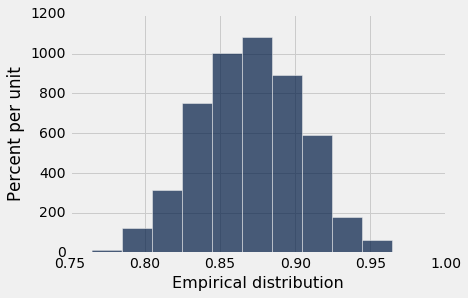

In [196]:
permutation_test(age, 'Gender', 'Number of people in workforce', tvd)

In [159]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def mean_squared_error(table, x, y):
    def for_line(a, b):
        estimate = a * table.column(x) + b
        return np.mean((table.column(y) - estimate) ** 2)
    return for_line

def residual_plot(table, x, y):
    fitted = fit(table, x, y)
    residuals = table.column(y) - fitted
    res_table = Table().with_columns([
            'predictor', table.column(x), 
            'residuals', residuals])
    res_table.scatter(0, 1)

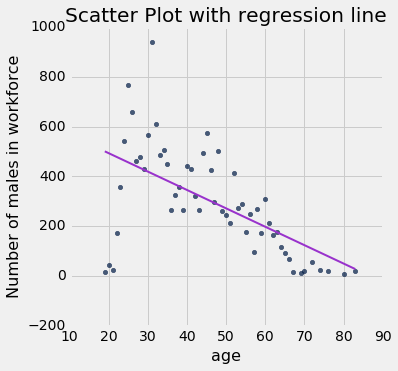

In [188]:
age_male.scatter('age', 'Number of males in workforce')
plt.plot(age_male.column(2), np.poly1d(np.polyfit(age_male.column(2), age_male.column(3), 1))(age_male.column(2)),\
         color='darkorchid', linewidth=2)
plt.title('Scatter Plot with regression line')


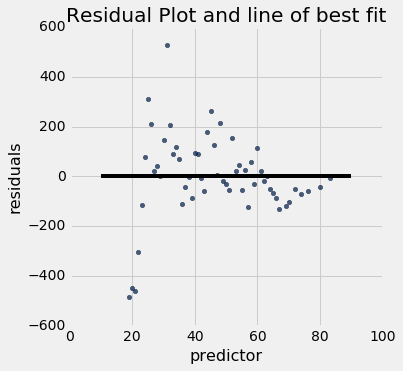

In [161]:
residual_plot(age_male, 'age', 'Number of males in workforce')
plt.hlines(y = 0, xmin = 10, xmax = 90)
plt.title('Residual Plot and line of best fit')
plt.show()

In [162]:
a = slope(age_male, 'age', 'Number of males in workforce')
b = intercept(age_male, 'age', 'Number of males in workforce')
print(a, '* x +', b)

-7.38841011976 * x + 640.944768305


In [163]:
r = correlation(age_male, 'age', 'Number of males in workforce')
r

-0.59420450106832867

In [164]:
zero_year = b 
five_years = a * 5 + b 
ten_years = a * 10 + b 
print("As a male gets a year older, the predicted number of males is in workforce", zero_year)
print("As a male gets 5 years older, the predicted number of males is in workforce", five_years)
print("As a male gets 10 years older, the predicted number of males is in workforce", ten_years)

As a male gets a year older, the predicted number of males is in workforce 640.944768305
As a male gets 5 years older, the predicted number of males is in workforce 604.002717706
As a male gets 10 years older, the predicted number of males is in workforce 567.060667107


In [165]:
def fitted_value(table, x, y, given_x):
    a = slope(table, x, y) 
    b = intercept(table, x, y)
    return a * given_x  + b

new_five_years_wait = fitted_value(age_male, 'age', 'Number of males in workforce', 5)
new_five_years_wait

604.00271770626478

In [166]:
def bootstrap_lines(B):
    lines = Table(['slope', 'intercept'])
    for _ in range(B):
        boot_sample = age_male.sample(with_replacement=True) 
        a = slope(boot_sample, 'age', 'Number of males in workforce') 
        b = intercept(boot_sample, 'age', 'Number of males in workforce') 
        lines.append([a,b]) 
    return lines
        
regression_lines = bootstrap_lines(1000)
regression_lines

slope,intercept
-6.93139,623.96
-9.95674,786.337
-10.7765,824.246
-6.65326,590.502
-5.29206,543.742
-7.29055,636.362
-4.11452,455.964
-6.09717,565.367
-12.0726,915.912
-7.61133,660.62


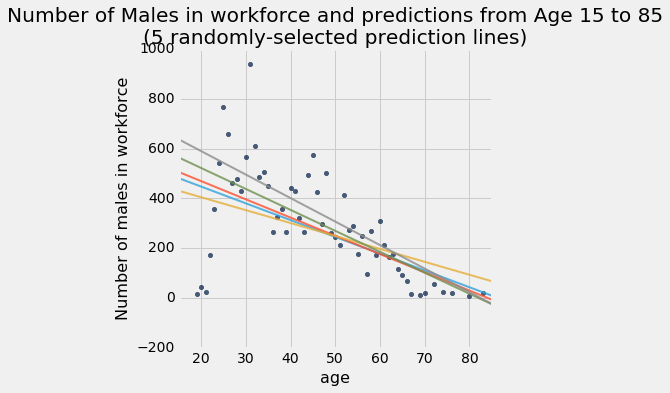

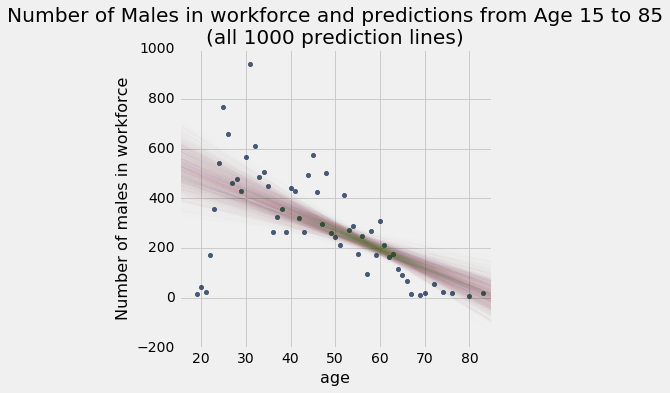

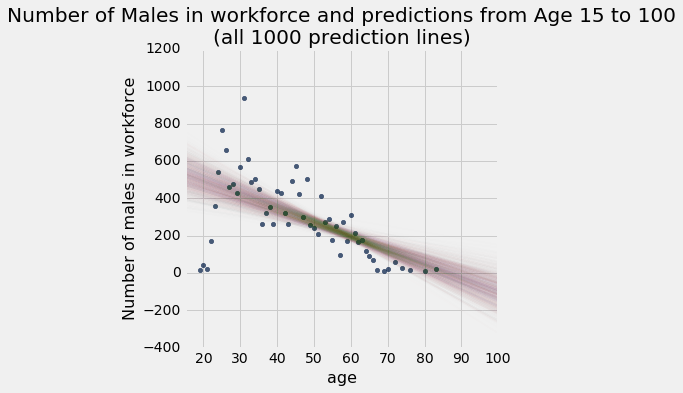

In [176]:
def plot_lines(num_lines, min_x, max_x):
    # Plot all the actual data.
    age_male.scatter('age', 'Number of males in workforce')
    xs = np.array([min_x, max_x])
    some_lines = regression_lines.sample(num_lines)
    for resample_idx in range(some_lines.num_rows):
        resample_slope = some_lines.column('slope').item(resample_idx)
        resample_intercept = some_lines.column('intercept').item(resample_idx)
        predictions = xs*resample_slope + resample_intercept
        plt.plot(xs, predictions, lw=2, alpha=4/num_lines)
    plt.xlim([min_x, max_x])
    prediction_lines_message = "%d randomly-selected prediction lines" % num_lines if num_lines < regression_lines.num_rows else "all %d prediction lines" % num_lines
    plt.title("Number of Males in workforce and predictions from Age %1d to %1d\n(%s)" % (min_x, max_x, prediction_lines_message))

plot_lines(5, 15, 85)
plot_lines(1000, 15, 85)
plot_lines(1000, 15, 100)

In [168]:
def prediction_interval(x):
    boot_lines = bootstrap_lines(1000) 
    predictions = boot_lines.column('slope') * x + boot_lines.column('intercept') 
    return [percentile(2.5, predictions), percentile(97.5, predictions)] 

In [169]:
# generate prediction intervals for  x=1,2,3,…,998,999,1000
intervals = Table().with_columns(["Ages", [], "left end", [], "right end", []])
for x in np.arange(1, 100):

    interval = prediction_interval(x) 
    intervals.append([x, interval[0], interval[1]])

def width(left_end, right_end):
    return right_end - left_end
intervals.append_column("width", intervals.apply(width, ["left end", "right end"]))
intervals

Ages,left end,right end,width
1,451.402,834.955,383.553
2,441.793,810.484,368.69
3,433.96,814.667,380.707
4,440.34,802.704,362.364
5,442.104,797.403,355.299
6,432.117,785.013,352.896
7,420.901,766.905,346.004
8,427.421,757.232,329.811
9,417.783,734.044,316.261
10,410.504,746.574,336.07


In [170]:
model = sm.OLS(age_male.column(3), age_male.column(2))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     39.26
Date:                Wed, 04 May 2016   Prob (F-statistic):           5.97e-08
Time:                        23:20:27   Log-Likelihood:                -394.30
No. Observations:                  56   AIC:                             790.6
Df Residuals:                      55   BIC:                             792.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.6751      0.746      6.266      0.000         3.180     6.170
==============================================================================
Omnibus:                        1.172   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.193
Skew:                           0.318   Prob(JB):                        0.551
Kurtosis:                       2.674   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

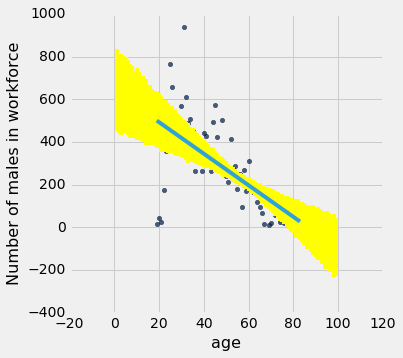

In [171]:
age_male.select([2,3]).scatter(0, 1)
for point_idx in range(intervals.num_rows):
    x = intervals.column("Ages").item(point_idx)
    low = intervals.column("left end").item(point_idx)
    high = intervals.column("right end").item(point_idx)
    plt.plot([x, x], [low, high], 'yellow')
plt.plot(age_male.column(2), np.poly1d(np.polyfit(age_male.column(2), age_male.column(3), 1))(age_male.column(2)))

In [172]:
predictions = regression_lines.column('slope') * 25 + regression_lines.column('intercept') #SOLUTION
regression_lines_with_predictions = regression_lines.with_column("Predictions at Age = 25", predictions) #SOLUTION
regression_lines_with_predictions

slope,intercept,Predictions at Age = 25
-6.93139,623.96,450.676
-9.95674,786.337,537.418
-10.7765,824.246,554.833
-6.65326,590.502,424.17
-5.29206,543.742,411.441
-7.29055,636.362,454.099
-4.11452,455.964,353.101
-6.09717,565.367,412.937
-12.0726,915.912,614.096
-7.61133,660.62,470.336


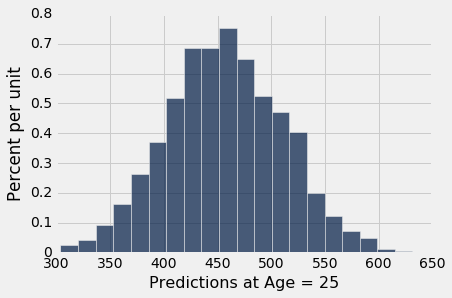

In [173]:
regression_lines_with_predictions.hist('Predictions at Age = 25', bins = 20)

In [174]:
boot_lines = bootstrap_lines(1000) 
slopes = boot_lines.column('slope') 
slope_interval = [percentile(0.5, slopes), percentile(99.5, slopes)] 
slope_interval = np.array(slope_interval)
slope_interval

array([-11.82431642,  -3.16215467])

In [175]:
reject_furd = not(slope_interval.item(0) < 0 < slope_interval.item(1)) 
reject_furd

True